In [1]:
'''
Library declare
@Author: MinHyung Lee
@Since: 2022/05/22
Used library:
pandas
numpy
featuretools
matplot
sklearn
seaborn

'''

import pandas as pd
import numpy as np
import featuretools as ft
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import  r_regression, SelectKBest
from sklearn.pipeline import make_pipeline

from woodwork.logical_types import Categorical, Boolean
from sklearn.preprocessing import OrdinalEncoder
from math import sqrt, log10, ceil
'''
Add plt config
@Author: MinHyung Lee
@Since: 2022/05/24

'''

import matplotlib.ticker as ticker
plt.style.use('ggplot')
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['figure.figsize'] = [12, 9]
rcParams['font.size'] = 16
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
rcParams['figure.dpi'] = 600

pd.set_option('display.max_rows', 20)

random_state = 7777

In [8]:
X = pd.read_csv("preprocessed_feature.csv", index_col=[0])
y = pd.read_csv("preprocessed_target.csv", index_col=[0])
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size = 0.2, random_state=random_state)


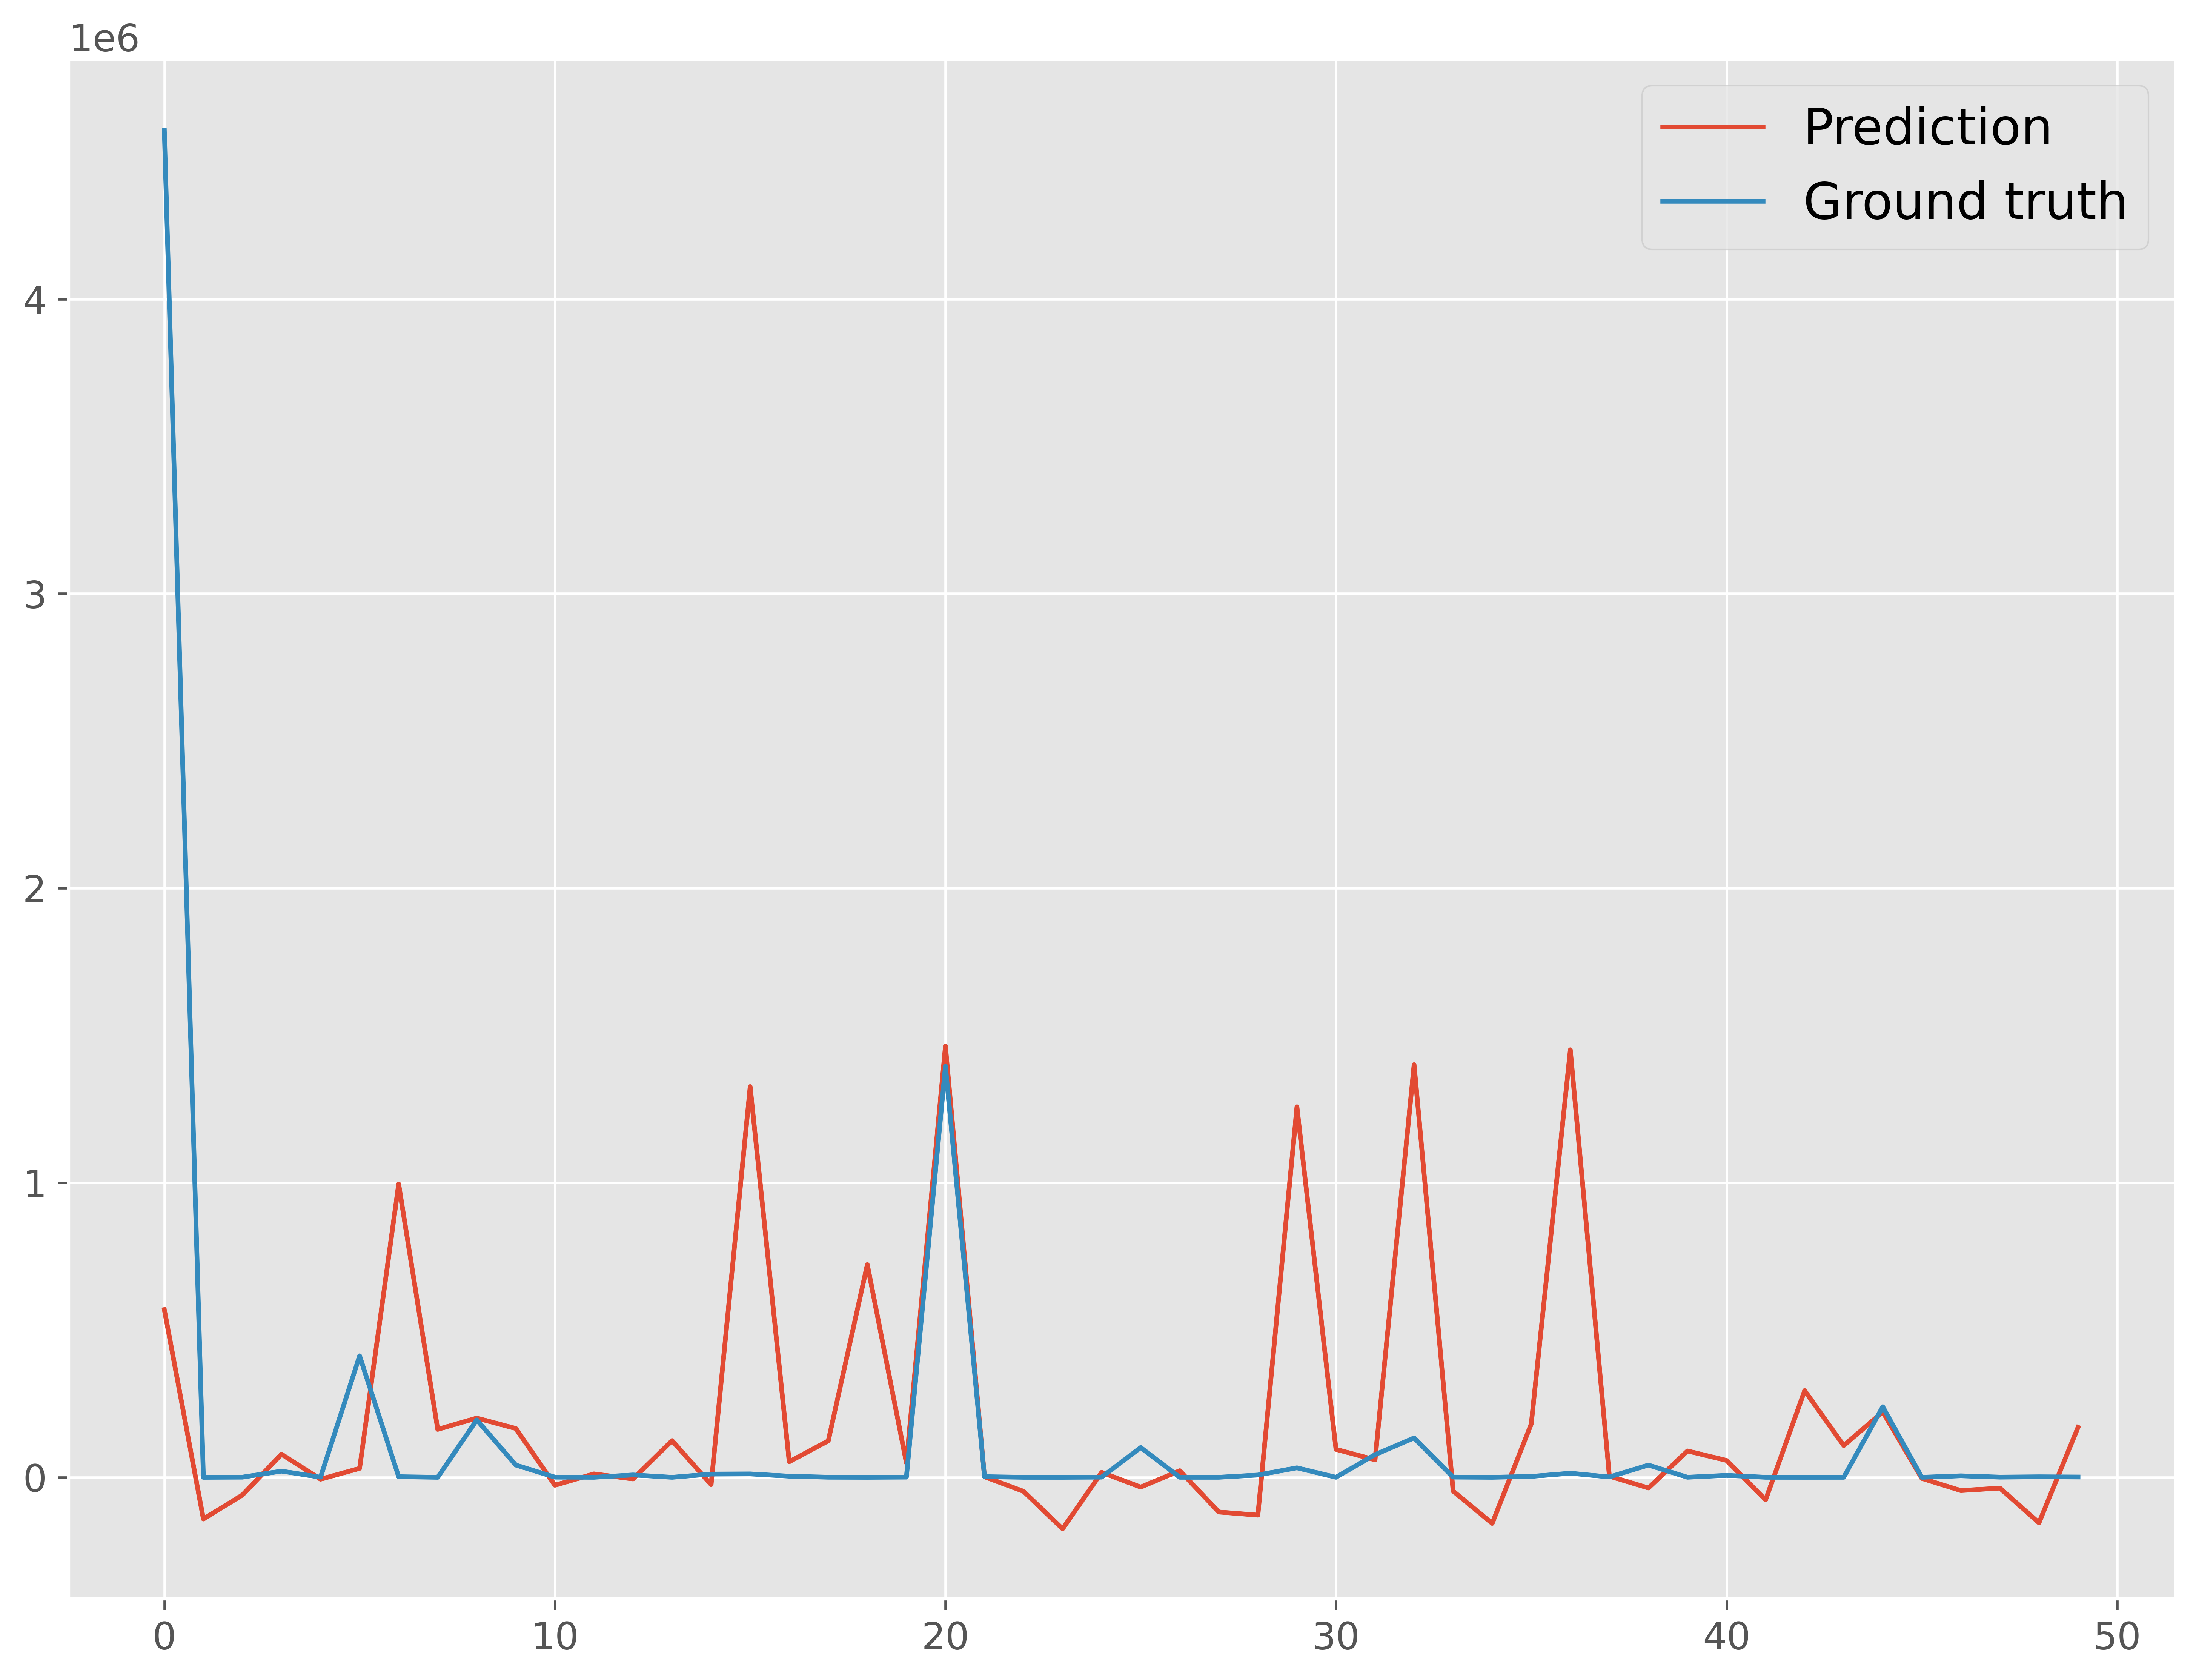

In [9]:
reg = LinearRegression()
reg.fit(X_train, y_train)


plt.plot(reg.predict(X_test[:50]), label="Prediction")
plt.plot(y_test[:50].values.reshape(-1, 1), label="Ground truth")
plt.legend()


In [10]:
y_predict = reg.predict(X_test)

# MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_predict)

# MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_predict)
# MSLE (Mean Squared Log Error)
msle = log10(mse)
# RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_predict)
# RMSLE (Root Mean Squared Log Error)
rmsle = log10(rmse)



print('MAE (Mean Absolute Error):', mae)
print("---------------")
print("MSE (Mean Squared Error):", mse)
print("MSLE (Mean Squared Log Error):", msle)
print("---------------")
print("RMSE (Root Mean Squared Error):", rmse)
print("RMSLE (Root Mean Squared Log Error):", rmsle)

print("-----score------")
print(reg.score(X_train, y_train))

MAE (Mean Absolute Error): 333977.4865612035
---------------
MSE (Mean Squared Error): 6755933575348.369
MSLE (Mean Squared Log Error): 12.829685370916513
---------------
RMSE (Root Mean Squared Error): 6755933575348.369
RMSLE (Root Mean Squared Log Error): 12.829685370916513
-----score------
0.030001556785109518
